In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("D:\Insurance-prediction-Project\Insurance-Prediction-Project\insurance.csv")

df.head(5)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [6]:
df.shape

(1338, 7)

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [10]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
# Creating new column  name Cat_age and categorize all age in Age Ranges 1 to 5

df['cat_age'] = pd.cut(
                df["age"],
                bins=[0.0,20.0,30.0,40.0,50.0, np.inf],
                labels=[1,2,3,4,5]
            )

In [14]:
# Checking new data for new column cat_age

df["cat_age"]

0       1
1       1
2       2
3       3
4       3
       ..
1333    4
1334    1
1335    1
1336    2
1337    5
Name: cat_age, Length: 1338, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [15]:
# Checking new column added or not inthe dataframe

df.head(5)


,age,sex,bmi,children,smoker,region,expenses,cat_age
0,19,female,27.9,0,yes,southwest,16884.92,1
1,18,male,33.8,1,no,southeast,1725.55,1
2,28,male,33.0,3,no,southeast,4449.46,2
3,33,male,22.7,0,no,northwest,21984.47,3
4,32,male,28.9,0,no,northwest,3866.86,3


In [16]:
# checking unique value in new column of cat_age

df["cat_age"].unique()

[1, 2, 3, 4, 5]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

<AxesSubplot: ylabel='Frequency'>

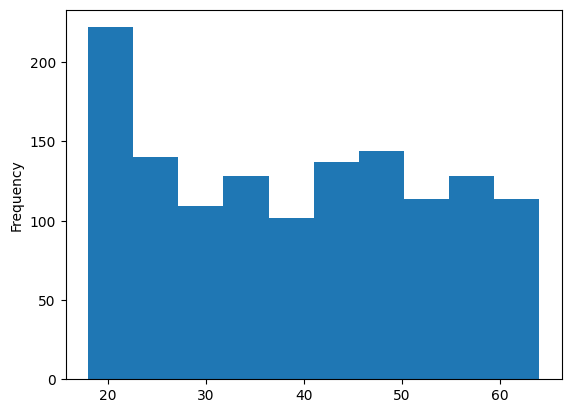

In [17]:
# Create Ploting of histogram related in age column

df['age'].plot(kind='hist')

<function matplotlib.pyplot.show(close=None, block=None)>

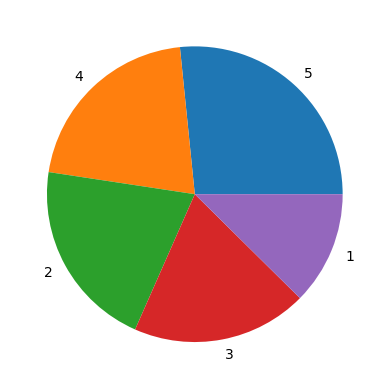

In [18]:
# Plotting pie chat related with cat_age

plt.pie(df.cat_age.value_counts(), labels=df.cat_age.value_counts().index)
plt.show

In [19]:
# checking unique related values in children column

df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [20]:
# checking all statistical description of numerical column

df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [22]:
# checking all dtype of column

df.dtypes

age            int64
sex           object
bmi          float64
children       int64
smoker        object
region        object
expenses     float64
cat_age     category
dtype: object

In [23]:
df['expenses']=df['expenses'].astype('float64')
df['expenses']

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [24]:
df.dtypes

age            int64
sex           object
bmi          float64
children       int64
smoker        object
region        object
expenses     float64
cat_age     category
dtype: object

In [26]:
# checking all unique value in sex column

df['sex'].unique()

array(['female', 'male'], dtype=object)

In [27]:
# checking all unique value in smoke column

df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [28]:
# checking all unique value in reagion column

df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [29]:
# checking correlation between all numerical column

corr = df.corr()

corr

C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_10096\2441297280.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

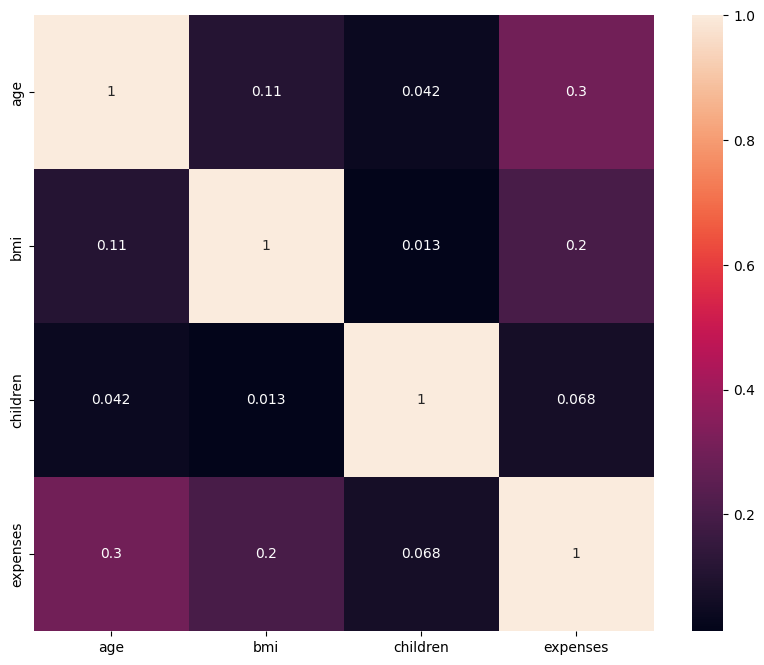

In [30]:
# Plotting Heatmap for checking correlation between all numerical columns

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)
plt.show

<AxesSubplot: xlabel='bmi', ylabel='expenses'>

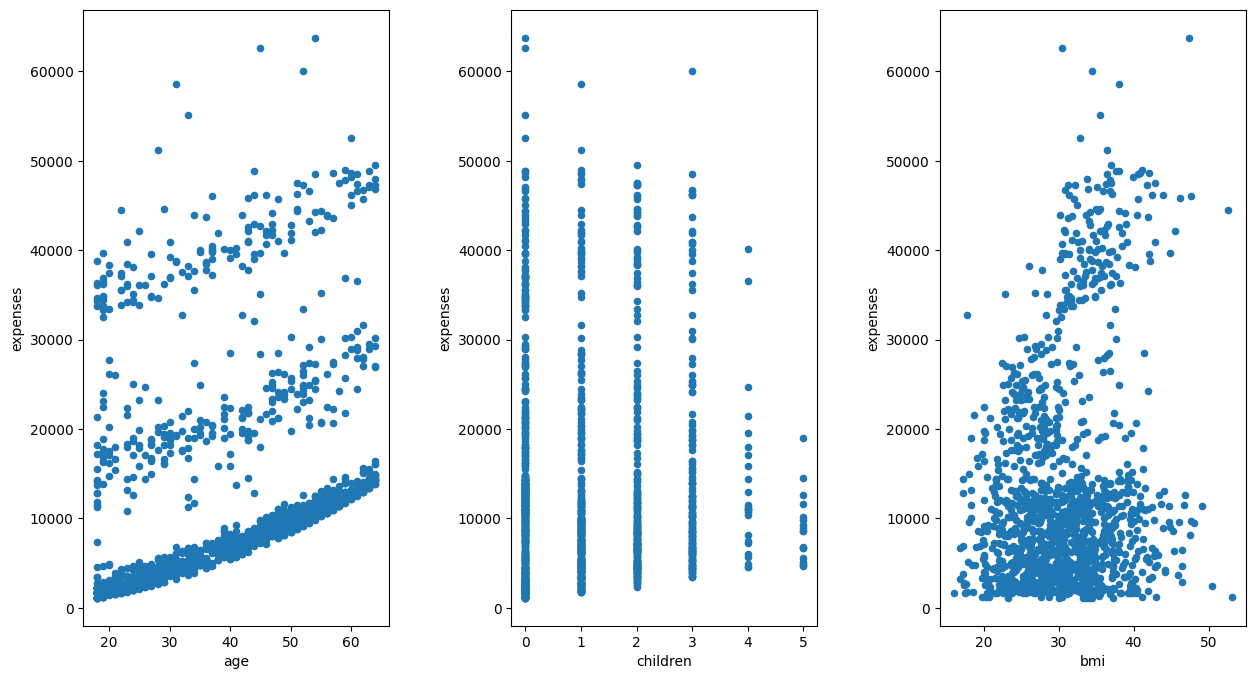

In [35]:
# create scatter plot to find relationship with expenses vs [age, bim, children] columns

fig, axes = plt.subplots(ncols=3, figsize = (15,8), squeeze=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
df.plot(kind='scatter', x='age', y='expenses', ax=axes[0])
df.plot(kind='scatter', x='children', y='expenses', ax=axes[1])
df.plot(kind='scatter', x='bmi', y='expenses', ax=axes[2])

